# Throughput Benchmark

In this notebook, we will investigate how batch size affects the throughput during recurrent autoregressive sampling.

In the paper, this is provided as an additional experiment in Appendix B.

## Prelude

In [1]:
%matplotlib inline

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm.auto import tqdm
import copy
import IPython.display as ipd
from time import time

# Custom modules
from sashimi import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
device

device(type='cuda')

## Model and Benchmark

In [4]:
model = SaShiMi(
    input_dim=1,
    hidden_dim=64,
    output_dim=256,
    state_dim=64,
    sequence_length=16000,
    block_count=4,
    encoder=Embedding(256, 64),
).to(device)

No need to train the model for this experiment; we will only do performance benchmark.

In [8]:
benchmark_sequence = 2000

In [9]:
def measure(model, batch_size):
    start = time()
    with torch.no_grad():
        generate_audio_sample(model, benchmark_sequence, batch_size=batch_size)
    end = time()
    return end - start

In [21]:
throughput = [(benchmark_sequence * 2**i) / measure(model, 2**i) for i in tqdm(range(10))]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

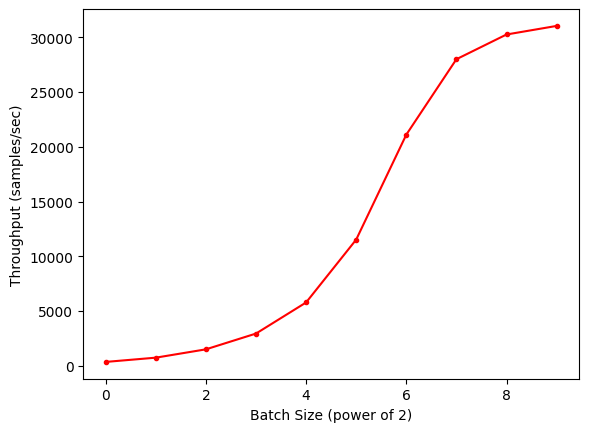

In [22]:
plt.figure()
plt.xlabel("Batch Size (power of 2)")
plt.ylabel("Throughput (samples/sec)")
plt.plot(throughput, '.r-')

Now let's plot that in **log-scale**:

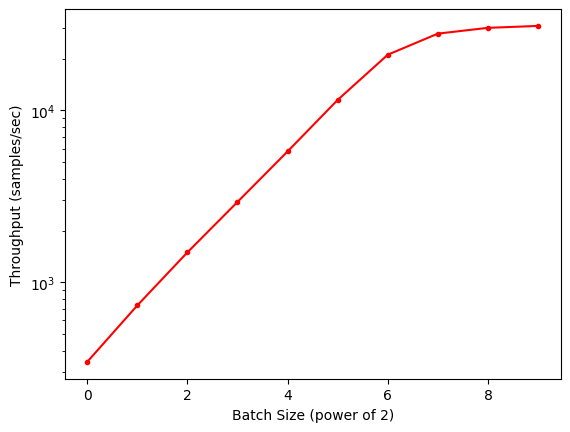

In [23]:
plt.figure()
plt.xlabel("Batch Size (power of 2)")
plt.ylabel("Throughput (samples/sec)")
plt.yscale("log")
plt.plot(throughput, '.r-')

Our results are consistent with the results given in Appendix B of the paper (Figure 4). Note that we don't expect our implementation to reproduce the same throughput values exactly, because the performance is dependent on many factors including hardware and subtle implementation details. Since the scaling follows the same trend in both our implementation and in the paper, we can conclude that we have reproduced this experiment.